![Banner](img/banner.png)


# **Actividad N°1:** Descenso de Gradiente con paso constante

***Matemáticas para Machine Learning.***

Semana 6 - Lección 2 : Descenso de Gradiente

**Profesor:** *Fernando Enrique Lozano Martinez* - **Autor Notebook:** *Sergio David Salazar Isairias*


# Introducción

## Descripción 

El presente *jupyter notebook* contine todo el material para el desarrollo de la actividad de programación 1 de la Semana 5 del curso ***Matemáticas para Machine Learning***. En este se trabajará introduciendo algunos conceptos clave del cálculo multivariable como la derivada direccional.

**Objetivos de Aprendizaje:**

*   Implementar el método de descenso de gradiente sobre formas polinomiales de hasta grado 2.

## Metodología

En este laboratorio se trabajará con un funciones polinomiales de grado 2 y, paso a paso, se construirá el algoritmo de descenso de gradiente sobre este tipo de funciones.

__________________________________________________________________________________

Para desarrollar el taller usted deberá editar las celdas de código dispuestas para esto. Estas estarán marcadas con el siguiente comentario:

```python
# =====================================================
# COMPLETAR ===========================================
# 

# =====================================================
```

Edite o complete el código dentro de estas líneas de comentarios. Dentro de estos comentarios encontrará indicaciónes de lo que debe hacer, así como algunas de las variables que debe utilizar o calcular (puede que estas tengan ya una estructura para llenar o no, revise y complete la asignación). 

En este notebook, cada punto tendrá una sección para probar libremente el trabajo realizado explorando sus resultados, asi como también una sección de pruebas avanzadas las cuales serán autocalificadas. Las secciones de código utilizadas para señalar estos espacios son respectivamente


```python
# PROBAR ==========================================================
funcion_trabajada()
```
y 

```python
### ==========================================================================
### PRUEBAS AVANZADAS ========================================================
pruebas_avanzadas(funcion_trabajada)
```


# Teoría

El algoritmo de descenso de gradiente, es un procedimiento iterativo que encuentra mínimos locales sobre una función. La idea básica consiste en, a partir de un punto inicial, tomar pasos en la dirección opuesta al gradiente, garantizando así la disminución del valor de la función. Este lo podemos escribir en pseudocódigo de la siguiente manera:

<br>

$$\begin{split}
& \textrm{1. Inicializar } \mathbf{x}  \\
& \textrm{2. Calcular gradiente en } \mathbf{x} \\
& \textrm{3. Recalcular } \mathbf{x} \textrm{ moviendose en dirección opuesta al gradiente} \\
& \textrm{4. Repetir hasta condición de parada} \\
\end{split}$$


# Problemas

A continuación nos concentraremos en implementar descenso de gradiente con paso constante para un problema de regresión lineal.

In [1]:
# Básico
import numpy as np
import pandas as pd
from copy import copy

# Dibujar
import matplotlib.pyplot as plt
%matplotlib inline
import mpl_toolkits.mplot3d as plt3d

import plotly.express as px
import plotly.graph_objects as go
import plotly.colors as pcolors
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import display

In [2]:
# UTILIDADES =================================
# Correr una única vez por sesión ============
from maiautils import MaiaUtils
ipython = get_ipython()
mutils = MaiaUtils(ipython) 
# ============================================

In [3]:
# Estilo básico
LAYOUT = go.Layout(
    title_text=None, title_x=0.5,
    margin=dict(l=20, r=20, t=30, b=20),
    autosize=False, width=500, height=500,
    xaxis_title="$X$", 
    yaxis_title="$Y$",
    paper_bgcolor='rgba(255,255,255, 1)',
    plot_bgcolor='rgba(255,255,255, 1)'
)
COLORSCALES = ['Plasma','viridis','Blues'] 

## Planteamiento problema

Considere el problema de regresión lineal, en el cual se ajusta una recta a un conjunto de datos. Y considere el caso sencillo de 3 datos. Particularmente:

$$ \mathbf{x}_1 = (1,3) \quad \mathbf{x}_2 = (2,5) \quad \mathbf{x}_3 = (4,8)  $$

Utilizamos la convención $\mathbf{x}_i = (x_i , y_i)$ de tal manera que queremos ajustar la recta 

$$ a + bx = y$$

Para minimizar el error cuadrático dado por

$$ MSE = \sum (y_i - a + bx_i)^2$$

In [4]:
data = [(1,3), (2,5), (4,8)]

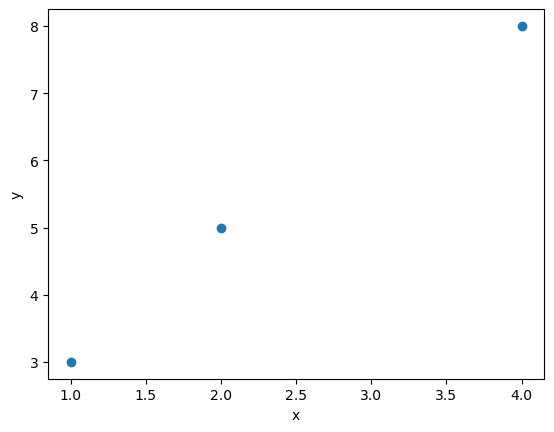

In [5]:
fig = mutils.plot_data(data)
fig

## Error cuadrático medio

Cree una función que para valores fijos de $a$ y $b$ encuentre el error cuadrático de los datos.

In [6]:
def mse(a, b, data):
    """ 
    Obtiene el valor del error cuadrático medio (MSE) a partir de un modelo lineal con parámetros a,b
    y un conjunto de datos.
    ___________________________________
    Entrada:
    data: [2D-array] Datos
    a, b: [float] Valores de los parámetros a y b del modelo
    n: [int] número de puntos a evaluar
    ___________________________________
    Salida:
    error :[1D-array] Valor del error cuadrático para cada valor de a considerado
    """
    # =====================================================
    # COMPLETAR ===========================================
    # AYUDA
    # REEMPLACE 0 POR LA EXPRESIÓN CORRECTA DEL ERROR
    # CUADRÁTICO.
    mse = sum([(x[1] - a - b*x[0])**2 for x in data ])
    # =====================================================
    return mse

In [7]:
mutils.correr_prueba_calcular_mse(mse)

__________________________________
Verificando errores...




Sin Errores
__________________________________


Cree una función que le permita calcular el gradiente del error cuadrático medio de un modelo de Regresión Lineal con dos parámetros ($a$ y $b$).

In [28]:
def dmse(a, b, data):
    """ 
    Obtiene el gradiente del mse en el punto (a,b)
    ___________________________________
    Entrada:
    data: [2D-array] Datos
    a: [float] Valor de a
    b: [int] número de puntos a evaluar
    ___________________________________
    Salida:
    error : [1D-array] Valor del error cuadrático para cada valor de a considerado
    """
    # =====================================================
    # COMPLETAR ===========================================
    # AYUDA
    # REEMPLACE dda POR LA DERIVADA PARCIAL DEL MSE RESPECTO A a.

    dda = sum([2*(b*xi[0] + a - xi[1]) + 1 for xi in data])
    ddb = sum([2*(b*xi[0] + a - xi[1])*xi[0] for xi in data])
    
    print(ddb)
    # =====================================================
    return dda, ddb

In [29]:
mutils.correr_prueba_calcular_derivada_mse(dmse)

__________________________________
Verificando errores...


6970


Sin Errores
__________________________________


## Descenso de gradiente con paso constante

Ahora vamos a utilizar el algoritmo de descenso de gradiente para localizar el punto $(a,b)$ que me ofrece el mínimo error cuadrático. 

In [30]:
def DG_paso_fijo(x0, data, lrate=0.01, max_iter=1000, tol=1e-5):
    """
    Encuentra el punto (a,b) que me brinda el mínimo MSE para los datos en data
    ___________________________________
    Entrada:
    x0:    [1D-array] punto inicial (a0, b0)
    data:  [2D-array] datos
    lrate: [float] Velocidad de aprendizaje
    max_iter: [int] Máximo número de iteraciones
    ___________________________________
    Salida:
    xf: [dict] Información sobre el trayecto recorrido hasta el mínimo {coords, val}
    """
    w = np.array(x0).reshape((2,1))
    dif = 1e3
    i = 0
    dic = {'a':[w[0]],'b':[w[1]]}
    
    while (i<max_iter and dif>tol):
        # =====================================================
        # COMPLETAR ===========================================
        # CALCULE EL GRADIENTE DEL MSE
        g = dmse(w[0], w[1], data)
        g = np.array(g).reshape((2,1))
        d = - lrate*g
        w = w  + d
        
        # ACTUALICE EL VALOR DE LOS PARÁMETROS (W).
        #
        
        dif = np.linalg.norm(d)
        
        dic['a'].append(w[0][0])
        dic['b'].append(w[1][0])
        
        i = i+1
    return dic

### Probar

In [31]:
dic= DG_paso_fijo([1,1],data)
df = pd.DataFrame(dic)

[-34]
[-18.46]
[-10.1888]
[-5.7844]
[-3.43705472]
[-2.18404253]
[-1.51322869]
[-1.15217485]
[-0.95595278]
[-0.84746512]
[-0.7856982]
[-0.7488336]
[-0.7252641]
[-0.70881449]
[-0.69619921]
[-0.68566991]
[-0.67629595]
[-0.66758175]
[-0.6592631]
[-0.65119895]
[-0.64331371]
[-0.63556668]
[-0.62793566]
[-0.62040836]
[-0.61297773]
[-0.60563951]
[-0.59839096]
[-0.59123013]
[-0.58415551]
[-0.57716582]
[-0.57025991]
[-0.56343671]
[-0.55669519]
[-0.55003435]
[-0.54345323]
[-0.53695085]
[-0.53052627]
[-0.52417857]
[-0.51790682]
[-0.5117101]
[-0.50558754]
[-0.49953822]
[-0.49356129]
[-0.48765587]
[-0.48182111]
[-0.47605616]
[-0.47036019]
[-0.46473237]
[-0.45917189]
[-0.45367794]
[-0.44824972]
[-0.44288645]
[-0.43758735]
[-0.43235165]
[-0.4271786]
[-0.42206745]
[-0.41701745]
[-0.41202787]
[-0.40709799]
[-0.4022271]
[-0.39741448]
[-0.39265945]
[-0.38796132]
[-0.38331939]
[-0.37873301]
[-0.3742015]
[-0.36972421]
[-0.36530049]
[-0.3609297]
[-0.35661121]
[-0.35234439]
[-0.34812862]
[-0.34396329]
[-0.339

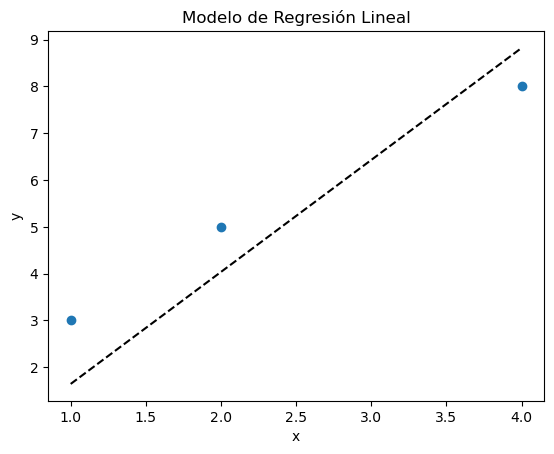

In [32]:
mutils.plot_model(dic['a'][-1],dic['b'][-1],data)

In [33]:
mutils.correr_prueba_descenso_gradiente(DG_paso_fijo)

__________________________________
Verificando errores...


[3312]
[-33628.08]
[342719.592]
[-3491624.351328]
[35573746.30659647]
[-3.62435277e+08]
[3.69259293e+09]
[-3.76211784e+10]
[3.83295179e+11]
[-3.90511941e+12]


Sin Errores
__________________________________
